# Project: Medical Appointment Analysis Project

## Table of content
1. Introduction
2. Data Wrangling
3. Exploratory Data Analysis
4. Conclusions

## 1. Introduction

Patients receiving medical treatment in a hospital, often times have a schduled appointment with the doctors concerning thier health condition. However, it is observed that some patients do not show up for thier appointments. This dataset collects information for 100,000 medical appointments in Brazil and is focused on the question of whether or not patients show up for thier appointment. This datasets also contains a number of characteristics or attributes about the patient and this are included in each row.
The goal of this project is to analyze this dataset and try to derive the most important reasons that affect a patient's attendance to thier scheduled appointment.

**Question for Analysis**
* Does gender affect patient's attendance?
* Does age affect patient's attendance?
* Does patient's neighborhood affect patient's attendance?
* Does scholarship affect patient's aattendance?
* Does type of disease affect patient's attendance?
* Does receiving message affect the patient's attendance?


In [1]:
# We now import the necessary libraries for the analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# Next we load our dataset for the analysis, and name it 'data'

data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

## 2. Data Wrangling

In this section, we want to check for the shape of the data, the datatypes, check for null and duplicated values, check for unique values and so on. Thereafter, we will clean the dataset and get it ready fot the exploration stage.

In [3]:
# Investigate the first 5 rows of our data

data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Lets also check for the last 5 rows of our data

data.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
# Lets now check for the shape of our data to know how many samples are contained in the dataset

data.shape

(110527, 14)

We can see that our datasets contains 110527 samples or rows and 14 columns 

In [5]:
# Check for some information in our datasets

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
# Check for the datatype of our datasets

data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

From inspecting the datatypes of our data we notice that the 'ScheduledDay' and 'AppointmentDay' Columns has object datatype instead of datetime. We will change this during our data cleaning stage

In [6]:
# Let us now check for the unique values in our categorical columns

data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [7]:
data['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [11]:
data['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
data['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

We notice that only about 20% of patient show up for their appointment. Hence, the need to find out what causes it. 

In [9]:
# We now want to check for null values 

data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The data contains no null values

In [10]:
# Check for duplicated values

data.duplicated().sum()

0

The data contains no duplicate values

In [11]:
# Check for some statistics about our numerical data

data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Notice that the min age is -1 and that must be removed as no one has an age of negative value

### Data Cleaning

In this stage, we now remove the irrelevants observations observed during the wrangling stage

In [12]:
# We drop the patientId and AppointmentID columns as they wont give us insights as to why a patients fail to attend to his appointment

data.drop(['PatientId', 'AppointmentID'], axis = 1, inplace= True)

In [13]:
# Confirm the changes has been made

data.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [14]:
# renamning our columns
data.rename(columns= lambda x: x.strip().lower().replace("-","_"), inplace = True)

# Again, we confirm the changes
data.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [15]:
# we now want to define a function that will strip off the date from the time in the 'scheduledday' and 'appointmentday' columns

def _date_(date):
    val = []
    for i in date:
        x = i[:-10]
        val.append(x)
    data['scheduledday'] = val
    return val[:4]
_date_(data['scheduledday'].values)

['2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29']

In [16]:
def _date_(date):
    val = []
    for i in date:
        x = i[:-10]
        val.append(x)
    data['appointmentday'] = val
    return val[:4]
_date_(data['appointmentday'].values)

['2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29']

In [19]:
#We now change the data type of scheduleday and appointmentday must be changed to datetime

data[['scheduledday', 'appointmentday']] = data[['scheduledday','appointmentday']].apply(pd.to_datetime)


In [20]:
# check the datatypes again to confirm the changes has been made

data.dtypes

gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hipertension               int64
diabetes                   int64
alcoholism                 int64
handcap                    int64
sms_received               int64
no_show                   object
dtype: object

In [21]:
# Remove the negative age

data = data[data['age'] >= 0]

In [22]:
data.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Notice that the min age of -1 has now been removed

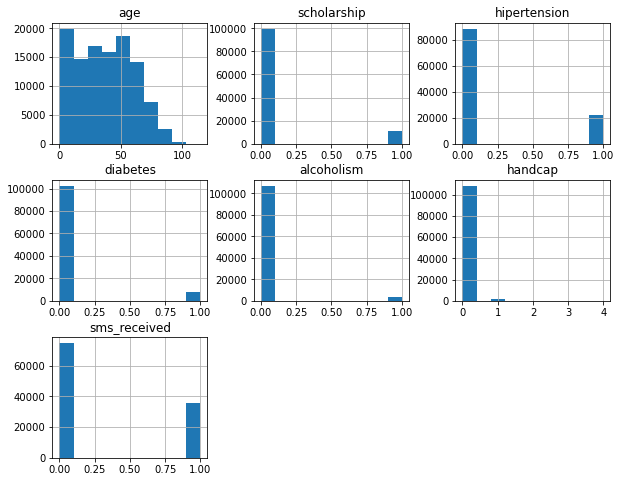

In [23]:
# Check the distribution of the numerical columns in the dataset
data.hist(figsize=(10,8));

## 3. Exploratory Data Analysis
 In this stage, we try to answer the answer the analysis questions


### ***a) Does gender affect patient's attendance?***

In [24]:
# Let us now group the patient accordinng to their gender and see the proportion of those that showed up and those that didnt show up 

data.groupby('gender').no_show.value_counts(normalize= True)

gender  no_show
F       No         0.796851
        Yes        0.203149
M       No         0.800321
        Yes        0.199679
Name: no_show, dtype: float64

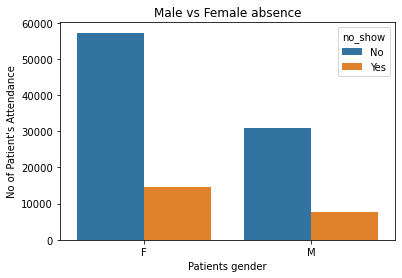

In [25]:
#Let us now visualize the patient's gender who showed up and those who dont show up

sns.countplot(x=data['gender'], hue=data['no_show']);
plt.title('Male vs Female absence');
plt.xlabel("Patients gender" );
plt.ylabel("No of Patient's Attendance");


**We notice from the above plot that the number of females who did not show up for their appointment is greater than that of the males**

### ***b)  Does age affect patient's attendance?***

In [26]:
data.groupby('age').no_show.value_counts(normalize=True)

age  no_show
0    No         0.819441
     Yes        0.180559
1    No         0.817422
     Yes        0.182578
2    No         0.844252
                  ...   
99   No         1.000000
100  No         1.000000
102  No         1.000000
115  Yes        0.600000
     No         0.400000
Name: no_show, Length: 203, dtype: float64

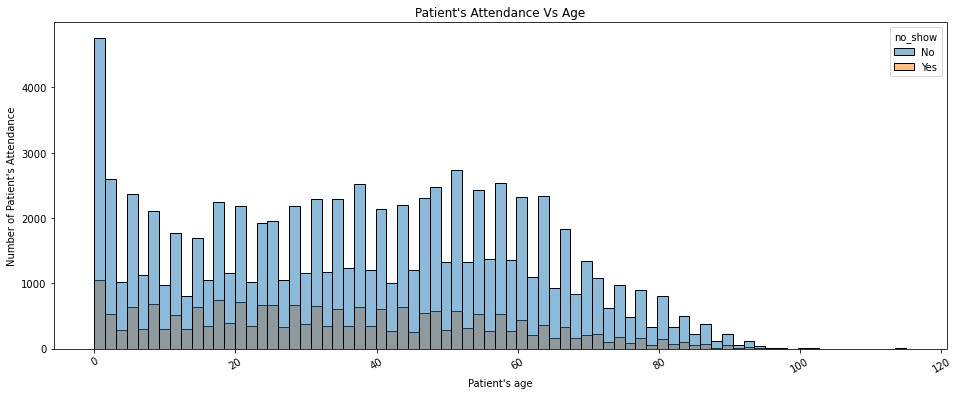

In [28]:
plt.figure(figsize=(16,6));
sns.histplot(x=data['age'], hue=data['no_show']);
plt.xticks(rotation=30);
plt.xlabel("Patient's age");
plt.ylabel("Number of Patient's Attendance");
plt.title("Patient's Attendance Vs Age");

From the above plot we notice that younger patient showed up for thier appointment more than the older patients

### ***C) Does patient's neighborhood affect patient's attendance?***


In [29]:
data.groupby('neighbourhood').no_show.value_counts(normalize=True)

neighbourhood    no_show
AEROPORTO        No         0.875000
                 Yes        0.125000
ANDORINHAS       No         0.769673
                 Yes        0.230327
ANTÔNIO HONÓRIO  No         0.815498
                              ...   
TABUAZEIRO       Yes        0.182950
UNIVERSITÁRIO    No         0.789474
                 Yes        0.210526
VILA RUBIM       No         0.834313
                 Yes        0.165687
Name: no_show, Length: 160, dtype: float64

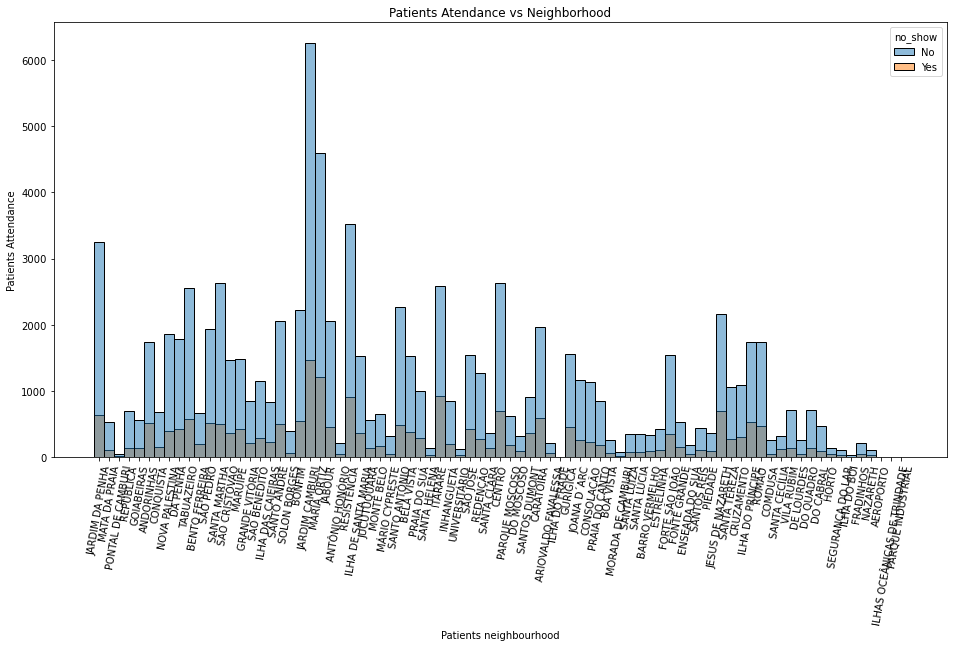

In [32]:
plt.figure(figsize=(16,8));
sns.histplot(x=data['neighbourhood'], hue=data['no_show']);
plt.title('Patients Atendance vs Neighborhood');
plt.xticks(rotation=80);
plt.xlabel('Patients neighbourhood');
plt.ylabel('Patients Attendance');

**We observe that most patient from almost all the neighbourhood showed up for their appointment**

### ***d) Does scholarship affect patient's aattendance?***

In [33]:
data.groupby('scholarship').no_show.value_counts(normalize=True)

scholarship  no_show
0            No         0.801926
             Yes        0.198074
1            No         0.762637
             Yes        0.237363
Name: no_show, dtype: float64

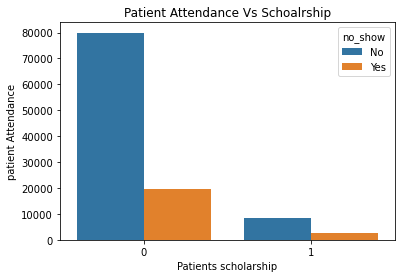

In [34]:
sns.countplot(x=data['scholarship'], hue=data['no_show']);
plt.title('Patient Attendance Vs Schoalrship');
plt.xlabel('Patients scholarship');
plt.ylabel('patient Attendance');

**From the visualization above, it is observed that patients with scholarships mostly do not attend thier appointment**

### ***e) Does type of disease affect patient's attendance?***

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-p

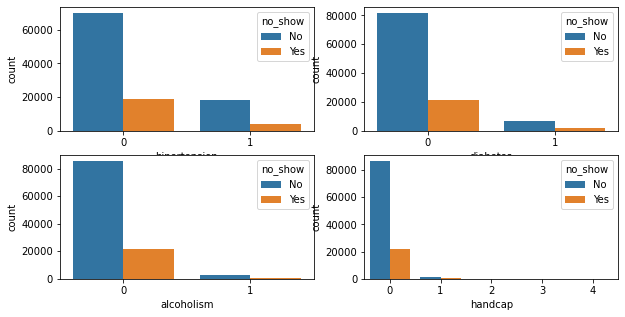

In [35]:
plt.figure(figsize=(10,5));

plt.subplot(2,2,1);

sns.countplot(data['hipertension'],hue=data['no_show']);

plt.subplot(2,2,2);

sns.countplot(data['diabetes'],hue=data['no_show']);

plt.subplot(2,2,3);

sns.countplot(data['alcoholism'],hue=data['no_show']);

plt.subplot(2,2,4);

sns.countplot(data['handcap'],hue=data['no_show']);

### ***e) Does receiving message affect the patient's attendance?***

In [36]:
data.groupby('sms_received').no_show.value_counts(normalize=True)

sms_received  no_show
0             No         0.832965
              Yes        0.167035
1             No         0.724255
              Yes        0.275745
Name: no_show, dtype: float64

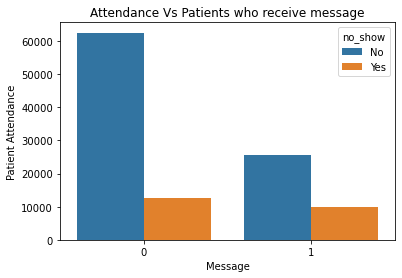

In [37]:
sns.countplot(x=data['sms_received'], hue=data['no_show']);
plt.title('Attendance Vs Patients who receive message');
plt.xlabel('Message');
plt.ylabel('Patient Attendance');

**The group of patient that received sms has less absent patients**


## 4. Conclusion 

The gender factor affects the Patients attendance as female Patients have more absentees than males. 
The age affects the patients attendance as the older patients have more absentees than young patients. 
The neighborhood does not really affects the Patients Attendance as the numbers of patient who attend their appointment are more than those who fail to attend.
The scholarship affects the Patients attendance as the group whith scholearship have more absent patients.
The diseases factor affects the patients attendance as the patient with diseases like hipertension, diabetes and handcap have less absents.
The sms-recieving  affects the patients attendance as the group who received sms has less absent patients.



### Limitation
The reason for the appointment and the doctor specialization could help in making better analysis for the patient' attendance to their appointment